In [54]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [57]:
X_train[9].shape

(28, 28)

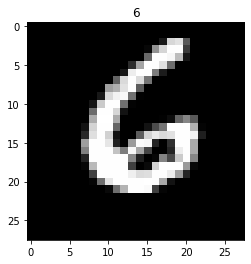

In [58]:
plt.imshow(X_train[90], cmap="gray")
plt.title(y_train[90])
plt.show()

In [59]:
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [60]:
X_train.shape

(60000, 784)

In [61]:
X_train[101].shape

(784,)

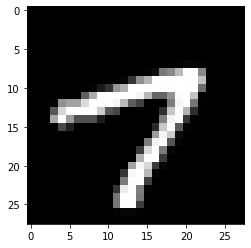

In [62]:
plt.imshow(X_train[101].reshape(28,28), cmap="gray")
plt.show()

# Neural Network Model

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [64]:
model = Sequential()

model.add( Dense(units=500, activation='relu', input_shape=(784,) ) )
model.add( Dense(units=300, activation='relu') )
model.add( Dense(units=200, activation='relu') )
model.add( Dense(units=100, activation='relu'))
model.add( Dense(units=32, activation='relu') )
model.add( Dense(units=10, activation='softmax'))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 626,662
Trainable params: 626,662
Non-trainable params: 0
________________________________________________

In [66]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [67]:
y_train[90]

6

In [68]:
from keras.utils import to_categorical

In [69]:
y_train = to_categorical(y_train)

In [70]:
y_train.shape

(60000, 10)

In [71]:
y_test = to_categorical(y_test)

In [72]:
y_test.shape

(10000, 10)

# Actual Training

In [73]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5,verbose=1, restore_best_weights=True )

In [74]:
his = model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3524 - accuracy: 0.7892 - val_loss: 0.2405 - val_accuracy: 0.9380

Epoch 00001: val_accuracy improved from -inf to 0.93800, saving model to ./best_model.h5
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1969 - accuracy: 0.9474 - val_loss: 0.1613 - val_accuracy: 0.9563

Epoch 00002: val_accuracy improved from 0.93800 to 0.95633, saving model to ./best_model.h5
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1431 - accuracy: 0.9615 - val_loss: 0.1719 - val_accuracy: 0.9559

Epoch 00003: val_accuracy did not improve from 0.95633
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1178 - accuracy: 0.9666 - val_loss: 0.2484 - val_accuracy: 0.9355

Epoch 00004: val_accuracy did not improve from 0.95633
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1013 - accuracy: 0.9726 - val_loss: 0.1415 - val_ac

In [75]:
his

In [76]:
history = his.history

In [77]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

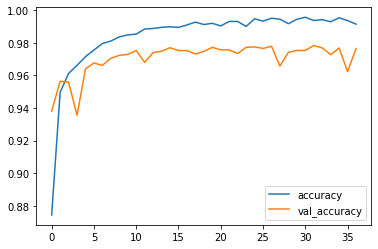

In [78]:
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

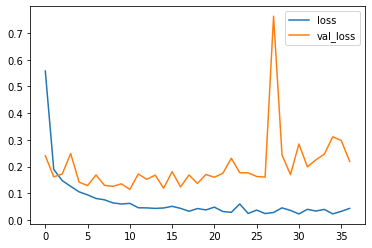

In [79]:
plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [80]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9790


[0.15682561695575714, 0.9789999723434448]

In [81]:
y_pred = model.predict(X_test)

In [82]:
y_pred.shape

(10000, 10)

In [83]:
np.argmax(y_pred[888])

2

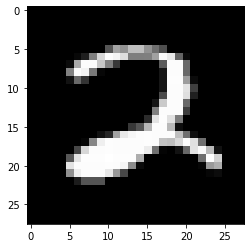

In [84]:
plt.imshow(X_test[888].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
model.save("mnist_model.h5")

# Load Keras Model

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model("./mnist_model.h5")

In [ ]:
new_model

In [ ]:
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9775


[0.24193164706230164, 0.9775000214576721]